In [ ]:
import torch
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import math
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision.transforms import v2

In [ ]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])


# Download and load training data
trainset = datasets.FashionMNIST('./data',download=True, train= True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size= 64, shuffle=True)

# Download and load test data
testset = datasets.FashionMNIST('./data',download=True, train= False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size= 64, shuffle=True)

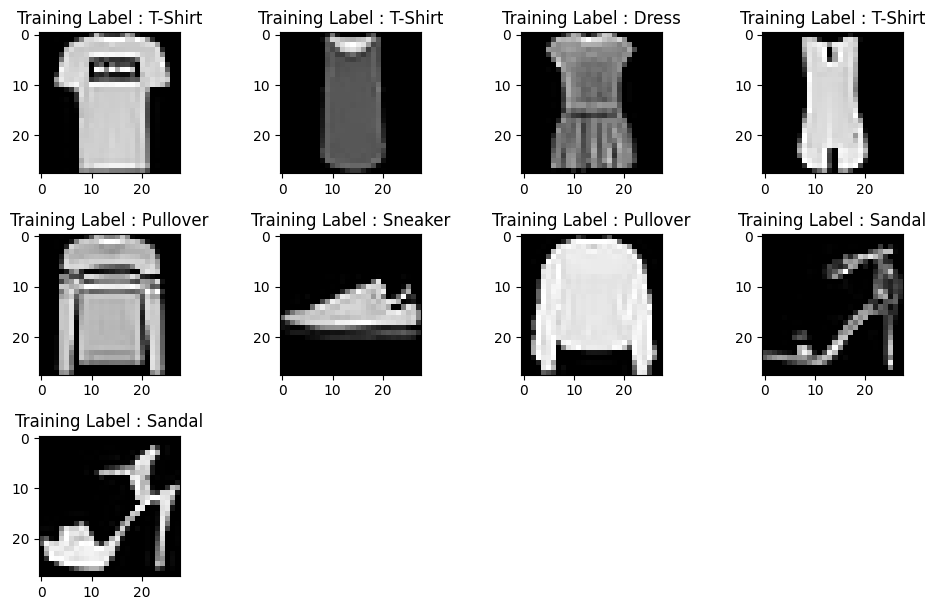

In [ ]:
labels_map = ('T-Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt','Sneaker', 'Bag', 'Ankle Boot')
fig = plt.figure(figsize=(10,10));
columns = 4;
rows = 5;
for i in range(1, 10):
    fig.add_subplot(rows, columns, i)
    fig.tight_layout()
    plt.imshow(trainset.train_data[i].numpy(), cmap='gray')
    plt.title('Training Label : %s' % labels_map[trainset.train_labels[i]])
plt.show()

## Part a

In [44]:
input_size = 784
out_size = 10

In [ ]:
"""
this model takes an input, flattens it, passes it through three fully connected layers with ReLU activations in between,
and finally applies a Softmax function to produce the output probabilities.
The model’s architecture suggests it could be used for a multi-class classification problem.
"""
model = nn.Sequential(
  nn.Flatten(),
  nn.Linear(input_size, 256),
  nn.ReLU(),
  nn.Linear(256, 128),
  nn.ReLU(),
  nn.Linear(128, out_size),
  nn.Softmax(dim=1)
)


In [ ]:
"""
The loss function is set to Cross Entropy Loss,
and the optimizer is Stochastic Gradient Descent with a learning rate of 0.01.
"""
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [ ]:
print(model)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=128, bias=True)
  (4): ReLU()
  (5): Linear(in_features=128, out_features=10, bias=True)
  (6): Softmax(dim=1)
)


In [ ]:
"""
This code is training a neural network model for a specified number of epochs. For each epoch,
it iterates over the training data, performs a forward pass to compute the output and loss,
performs a backward pass to compute gradients, and updates the model parameters.
It also keeps track of the running loss during each epoch and prints the average training loss at the end of each epoch.

"""
epochs = 10

for e in range(epochs):
  running_loss = 0
  for images, labels in trainloader:
    images = images.view(images.shape[0],-1)

    #reset the default gradients
    optimizer.zero_grad()

    # forward pass
    output = model(images)
    loss = criterion(output, labels)

    loss.backward()
    optimizer.step()

    running_loss = running_loss+loss.item()
  else:
    print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 2.1614864406301013
Training loss: 1.8777461525982122
Training loss: 1.7714030902777145
Training loss: 1.7130615763318564
Training loss: 1.6920097721919323
Training loss: 1.6816494993563653
Training loss: 1.674822153058896
Training loss: 1.6695071280892215
Training loss: 1.6653650854187987
Training loss: 1.6619441677004034


In [ ]:
!pip install d2l==0.17.0

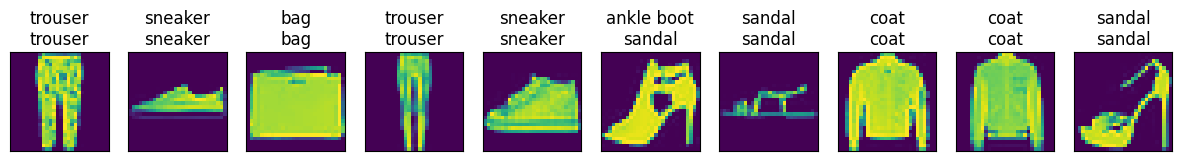

In [ ]:
## Test your model
from d2l import torch as d2l
d2l.predict_ch3(model,testloader,n = 10)

In [45]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print("Device", device)

Device cpu


## Part b

In [ ]:
"""
This code defines a deep neural network model, sets up the loss function and optimizer, and then trains the model for a specified number of epochs.
The model consists of five fully connected layers with ReLU activations and a Softmax output layer.
The loss function is Cross Entropy Loss, and the optimizer is Stochastic Gradient Descent with a learning rate of 0.1.

During training, for each epoch, the code iterates over the training data, performs a forward pass to compute the output and loss,
performs a backward pass to compute gradients, and updates the model parameters.
It also calculates the accuracy of the model on the training data.

After each epoch, the code evaluates the model on the test data, computes the loss and accuracy, and prints these values.
The losses and accuracies for both the training and test data are stored in lists for further analysis.
"""

model = nn.Sequential(
    nn.Linear(input_size, 1024),
    nn.ReLU(),
    nn.Linear(1024, 512),
    nn.ReLU(),
    nn.Linear(512, 512),
    nn.ReLU(),
    nn.Linear(512, 512),
    nn.ReLU(),
    nn.Linear(512, 512),
    nn.ReLU(),
    nn.Linear(512, out_size),
    nn.Softmax(dim=1),
)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)
## Train your model
epochs = 50

# Initialize lists to save the losses and accuracies
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

for e in range(epochs):
  running_loss = 0
  correct_train = 0
  total_train = 0

  for images, labels in trainloader:
    images, labels = images.to(device), labels.to(device)
    images = images.view(images.shape[0],-1)

    #reset the default gradients
    optimizer.zero_grad()

    # forward pass
    output = model(images)
    loss = criterion(output, labels)

    # calculate accuracy
    predicted = torch.argmax(output.data, -1)
    total_train += labels.size(0)
    correct_train += (predicted == labels).sum().item()

    loss.backward()
    optimizer.step()

    running_loss += loss.item()
  else:
    train_losses.append(running_loss/len(trainloader))
    train_accuracies.append(correct_train / total_train)

    running_loss2 = 0
    correct_test = 0
    total_test = 0

    for images, labels in testloader:
      images, labels = images.to(device), labels.to(device)
      images = images.view(images.shape[0],-1)
      with torch.no_grad():
        # forward pass
        output = model(images)
        loss = criterion(output, labels)

        # calculate accuracy
        predicted = torch.argmax(output.data, -1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()

        running_loss2 += loss.item()

    test_losses.append(running_loss2/len(testloader))
    test_accuracies.append(correct_test / total_test)

    print(f"Test loss: {test_losses[-1]},   Training loss: {train_losses[-1]}")
    print(f"Test accuracy: {test_accuracies[-1]}%,   Training accuracy: {train_accuracies[-1]}%")
    print("--------------------------------------------")


Test loss: 1.8140733211663118,   Training loss: 2.0858437393519926
Test accuracy: 0.6551%,   Training accuracy: 0.39525%
--------------------------------------------
Test loss: 1.743112292259362,   Training loss: 1.74581490269602
Test accuracy: 0.7178%,   Training accuracy: 0.7176%
--------------------------------------------
Test loss: 1.719034630781526,   Training loss: 1.7236677784401218
Test accuracy: 0.7428%,   Training accuracy: 0.7380333333333333%
--------------------------------------------
Test loss: 1.7104249524462753,   Training loss: 1.6840548323415745
Test accuracy: 0.7518%,   Training accuracy: 0.7779%
--------------------------------------------
Test loss: 1.6595982783918928,   Training loss: 1.651316067557345
Test accuracy: 0.8016%,   Training accuracy: 0.8105%
--------------------------------------------
Test loss: 1.6653179864215244,   Training loss: 1.6452809698037756
Test accuracy: 0.7956%,   Training accuracy: 0.8158833333333333%
-----------------------------------

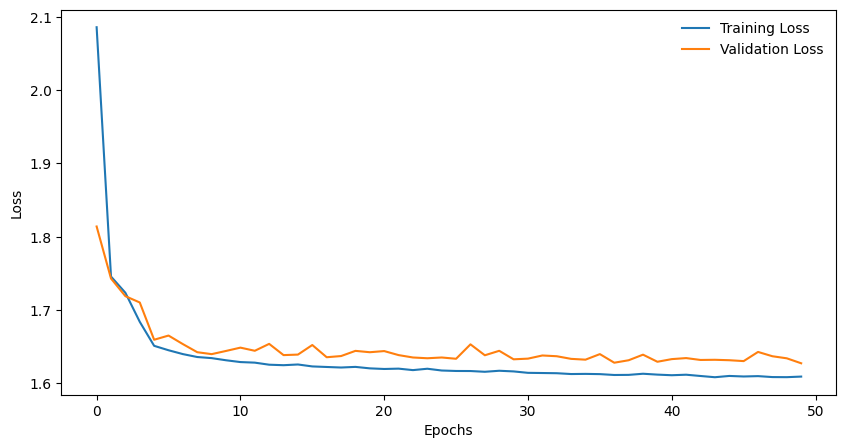

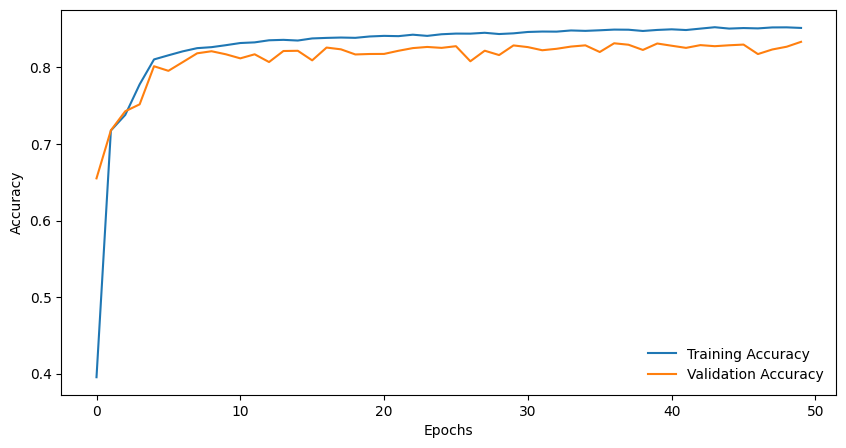

In [ ]:
# Plotting the loss
plt.figure(figsize=(10,5))
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(frameon=False)
plt.show()

# Plotting the accuracy
plt.figure(figsize=(10,5))
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(test_accuracies, label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(frameon=False)
plt.show()

In [ ]:
"""
These transformations are commonly used in image preprocessing to augment the dataset and improve model generalization.
"""

transform = transforms.Compose([
    transforms.ToTensor(),
    v2.RandomHorizontalFlip(p=0.8),
    v2.ColorJitter(brightness=0.25),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Download and load training data
trainset = datasets.FashionMNIST('./data',download=True, train= True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size= 64, shuffle=True)

# Download and load test data
testset = datasets.FashionMNIST('./data',download=True, train= False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size= 64, shuffle=True)

## Part c

In [ ]:
## Define the model
model = nn.Sequential(
    nn.Linear(input_size, 1024),
    nn.ReLU(),
    nn.Linear(1024, 512),
    nn.ReLU(),
    nn.Linear(512, 512),
    nn.ReLU(),
    nn.Linear(512, 512),
    nn.ReLU(),
    nn.Linear(512, 512),
    nn.ReLU(),
    nn.Linear(512, out_size),
    nn.Softmax(dim=1),
)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)
## Train your model
epochs = 50

# Initialize lists to save the losses and accuracies
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

for e in range(epochs):
  running_loss = 0
  correct_train = 0
  total_train = 0

  for images, labels in trainloader:
    images, labels = images.to(device), labels.to(device)
    images = images.view(images.shape[0],-1)

    #reset the default gradients
    optimizer.zero_grad()

    # forward pass
    output = model(images)
    loss = criterion(output, labels)

    # calculate accuracy
    predicted = torch.argmax(output.data, -1)
    total_train += labels.size(0)
    correct_train += (predicted == labels).sum().item()

    loss.backward()
    optimizer.step()

    running_loss += loss.item()
  else:
    train_losses.append(running_loss/len(trainloader))
    train_accuracies.append(correct_train / total_train)

    running_loss2 = 0
    correct_test = 0
    total_test = 0

    for images, labels in testloader:
      images, labels = images.to(device), labels.to(device)
      images = images.view(images.shape[0],-1)
      with torch.no_grad():
        # forward pass
        output = model(images)
        loss = criterion(output, labels)

        # calculate accuracy
        predicted = torch.argmax(output.data, -1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()

        running_loss2 += loss.item()

    test_losses.append(running_loss2/len(testloader))
    test_accuracies.append(correct_test / total_test)

    print(f"Test loss: {test_losses[-1]},   Training loss: {train_losses[-1]}")
    print(f"Test accuracy: {test_accuracies[-1]},   Training accuracy: {train_accuracies[-1]}")
    print("--------------------------------------------")


Test loss: 1.8467461865419035,   Training loss: 2.114152389548735
Test accuracy: 0.6277,   Training accuracy: 0.42105
--------------------------------------------
Test loss: 1.7584547191668467,   Training loss: 1.7718538352167175
Test accuracy: 0.7043,   Training accuracy: 0.6939166666666666
--------------------------------------------
Test loss: 1.7296268218641828,   Training loss: 1.7328770647425134
Test accuracy: 0.7316,   Training accuracy: 0.7287833333333333
--------------------------------------------
Test loss: 1.7271264624443783,   Training loss: 1.7223212161043813
Test accuracy: 0.7349,   Training accuracy: 0.7392833333333333
--------------------------------------------
Test loss: 1.7247084986632037,   Training loss: 1.7163288989809276
Test accuracy: 0.7365,   Training accuracy: 0.745
--------------------------------------------
Test loss: 1.7133114702382666,   Training loss: 1.7120327760161622
Test accuracy: 0.7481,   Training accuracy: 0.7496166666666667
--------------------

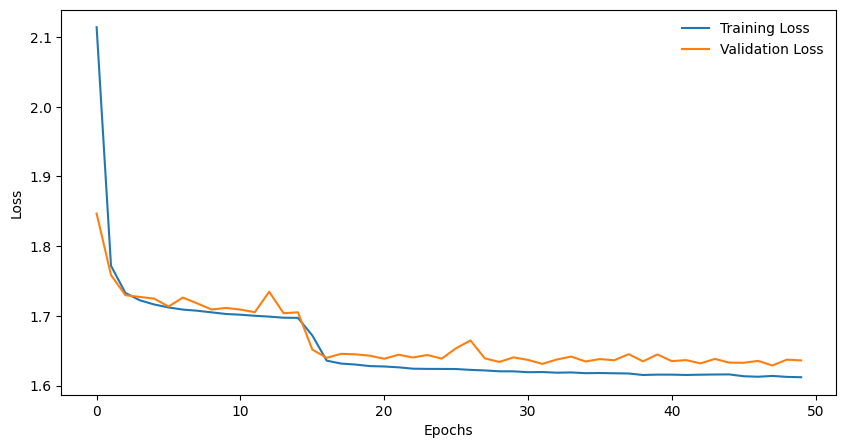

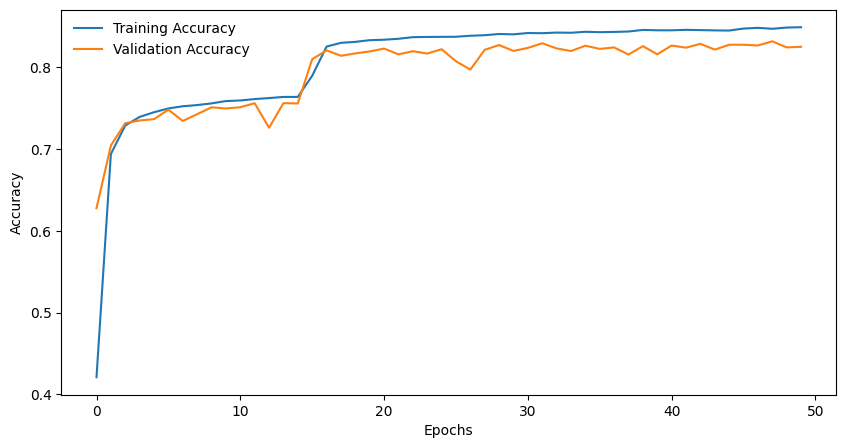

In [ ]:
# Plotting the losses
plt.figure(figsize=(10,5))
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(frameon=False)
plt.show()

plt.figure(figsize=(10,5))
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(test_accuracies, label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(frameon=False)
plt.show()

## Part D

In [ ]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

# Download and load training data
trainset = datasets.FashionMNIST('./data',download=True, train= True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size= 64, shuffle=True)

# Download and load test data
testset = datasets.FashionMNIST('./data',download=True, train= False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size= 64, shuffle=True)

In [ ]:
"""
The key difference in this code is the addition of weight_decay=0.0001 in the optimizer.
This introduces L2 regularization (also known as weight decay) into the model. During training,
a penalty term is added to the loss function that scales with the square of the magnitude of the weights.
This encourages the model to have smaller weights, leading to a simpler and more generalized model.
It helps prevent overfitting by discouraging learning a more complex model.
"""

## Define the model
model = nn.Sequential(
    nn.Linear(input_size, 1024),
    nn.ReLU(),
    nn.Linear(1024, 512),
    nn.ReLU(),
    nn.Linear(512, 512),
    nn.ReLU(),
    nn.Linear(512, 512),
    nn.ReLU(),
    nn.Linear(512, 512),
    nn.ReLU(),
    nn.Linear(512, out_size),
    nn.Softmax(dim=1),
)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1, weight_decay=0.0001)
## Train your model
epochs = 50

# Initialize lists to save the losses and accuracies
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

for e in range(epochs):
  running_loss = 0
  correct_train = 0
  total_train = 0

  for images, labels in trainloader:
    images, labels = images.to(device), labels.to(device)
    images = images.view(images.shape[0],-1)

    #reset the default gradients
    optimizer.zero_grad()

    # forward pass
    output = model(images)
    loss = criterion(output, labels)

    # calculate accuracy
    predicted = torch.argmax(output.data, -1)
    total_train += labels.size(0)
    correct_train += (predicted == labels).sum().item()

    loss.backward()
    optimizer.step()

    running_loss += loss.item()
  else:
    train_losses.append(running_loss/len(trainloader))
    train_accuracies.append(correct_train / total_train)

    running_loss2 = 0
    correct_test = 0
    total_test = 0

    for images, labels in testloader:
      images, labels = images.to(device), labels.to(device)
      images = images.view(images.shape[0],-1)
      with torch.no_grad():
        # forward pass
        output = model(images)
        loss = criterion(output, labels)

        # calculate accuracy
        predicted = torch.argmax(output.data, -1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()

        running_loss2 += loss.item()

    test_losses.append(running_loss2/len(testloader))
    test_accuracies.append(correct_test / total_test)

    print(f"Test loss: {test_losses[-1]},   Training loss: {train_losses[-1]}")
    print(f"Test accuracy: {test_accuracies[-1]},   Training accuracy: {train_accuracies[-1]}")
    print("--------------------------------------------")


Test loss: 1.7936092121585918,   Training loss: 2.0916029414388415
Test accuracy: 0.6822,   Training accuracy: 0.3750833333333333
--------------------------------------------
Test loss: 1.7420860270785679,   Training loss: 1.7450430377968338
Test accuracy: 0.7214,   Training accuracy: 0.7195
--------------------------------------------
Test loss: 1.7381174564361572,   Training loss: 1.7268046604544878
Test accuracy: 0.7235,   Training accuracy: 0.7351333333333333
--------------------------------------------
Test loss: 1.725282433685983,   Training loss: 1.718258475316867
Test accuracy: 0.7365,   Training accuracy: 0.7435
--------------------------------------------
Test loss: 1.7148481554286494,   Training loss: 1.7130116114992577
Test accuracy: 0.7468,   Training accuracy: 0.7483166666666666
--------------------------------------------
Test loss: 1.7191212625260566,   Training loss: 1.7088261483066371
Test accuracy: 0.7416,   Training accuracy: 0.75265
--------------------------------

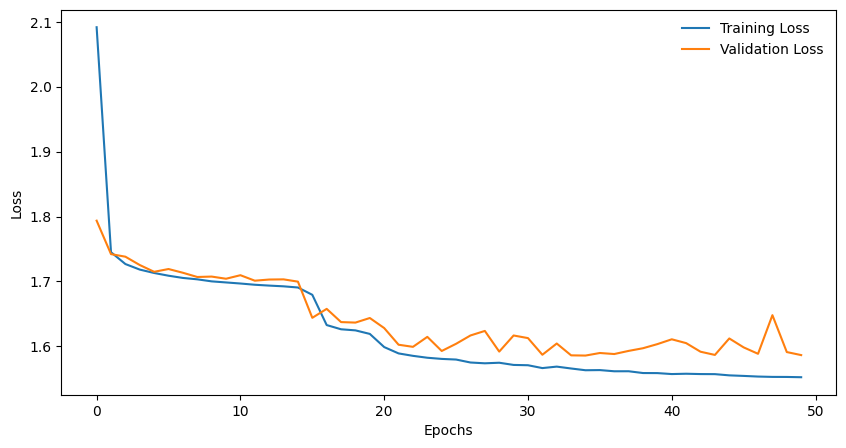

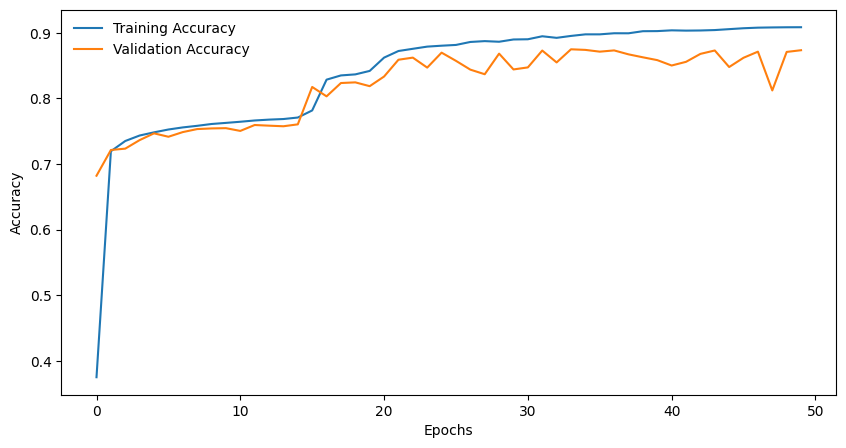

In [ ]:
# Plotting the losses
plt.figure(figsize=(10,5))
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(frameon=False)
plt.show()

plt.figure(figsize=(10,5))
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(test_accuracies, label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(frameon=False)
plt.show()

## All

In [46]:
transform = transforms.Compose([
    transforms.ToTensor(),
    v2.RandomHorizontalFlip(p=0.8),
    v2.ColorJitter(brightness=0.25),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Download and load training data
trainset = datasets.FashionMNIST('./data',download=True, train= True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size= 64, shuffle=True)

# Download and load test data
testset = datasets.FashionMNIST('./data',download=True, train= False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size= 64, shuffle=True)

In [47]:
"""
The model consists of five fully connected layers with ReLU activations and a Softmax output layer.
After each ReLU activation, a Dropout layer is added with a dropout rate of 0.2,
which randomly sets a fraction of input units to 0 at each update during training time to prevent overfitting.

The loss function is Cross Entropy Loss, and the optimizer is Stochastic Gradient Descent with a learning rate of 0.01.
The optimizer also includes weight_decay=0.0001, which introduces L2 regularization (also known as weight decay) into the model.
This encourages the model to have smaller weights, leading to a simpler and more generalized model.
It helps prevent overfitting by discouraging learning a more complex model.
"""

## Define the model
model = nn.Sequential(
    nn.Linear(input_size, 1024),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(1024, 512),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(512, 512),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(512, 512),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(512, 512),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(512, out_size),
    nn.Softmax(dim=1),
)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=0.0001)
## Train your model
epochs = 50

# Initialize lists to save the losses and accuracies
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

for e in range(epochs):
  running_loss = 0
  correct_train = 0
  total_train = 0

  for images, labels in trainloader:
    images, labels = images.to(device), labels.to(device)
    images = images.view(images.shape[0],-1)

    #reset the default gradients
    optimizer.zero_grad()

    # forward pass
    output = model(images)
    loss = criterion(output, labels)

    # calculate accuracy
    predicted = torch.argmax(output.data, -1)
    total_train += labels.size(0)
    correct_train += (predicted == labels).sum().item()

    loss.backward()
    optimizer.step()

    running_loss += loss.item()
  else:
    train_losses.append(running_loss/len(trainloader))
    train_accuracies.append(correct_train / total_train)

    running_loss2 = 0
    correct_test = 0
    total_test = 0

    for images, labels in testloader:
      images, labels = images.to(device), labels.to(device)
      images = images.view(images.shape[0],-1)
      with torch.no_grad():
        # forward pass
        output = model(images)
        loss = criterion(output, labels)

        # calculate accuracy
        predicted = torch.argmax(output.data, -1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()

        running_loss2 += loss.item()

    test_losses.append(running_loss2/len(testloader))
    test_accuracies.append(correct_test / total_test)

    print(f"Test loss: {test_losses[-1]},   Training loss: {train_losses[-1]}")
    print(f"Test accuracy: {test_accuracies[-1]},   Training accuracy: {train_accuracies[-1]}")
    print("--------------------------------------------")

Test loss: 2.302101253703901,   Training loss: 2.302340755330474
Test accuracy: 0.1597,   Training accuracy: 0.1362
--------------------------------------------
Test loss: 2.3013997852422627,   Training loss: 2.3017872254223204
Test accuracy: 0.1719,   Training accuracy: 0.16678333333333334
--------------------------------------------
Test loss: 2.299812529497086,   Training loss: 2.3007209423000115
Test accuracy: 0.1398,   Training accuracy: 0.1591
--------------------------------------------
Test loss: 2.293347659384369,   Training loss: 2.297441319107755
Test accuracy: 0.1008,   Training accuracy: 0.11673333333333333
--------------------------------------------
Test loss: 2.2700579576431568,   Training loss: 2.282252600452285
Test accuracy: 0.1253,   Training accuracy: 0.10558333333333333
--------------------------------------------
Test loss: 2.2474249214123767,   Training loss: 2.259829157196891
Test accuracy: 0.3137,   Training accuracy: 0.22111666666666666
----------------------

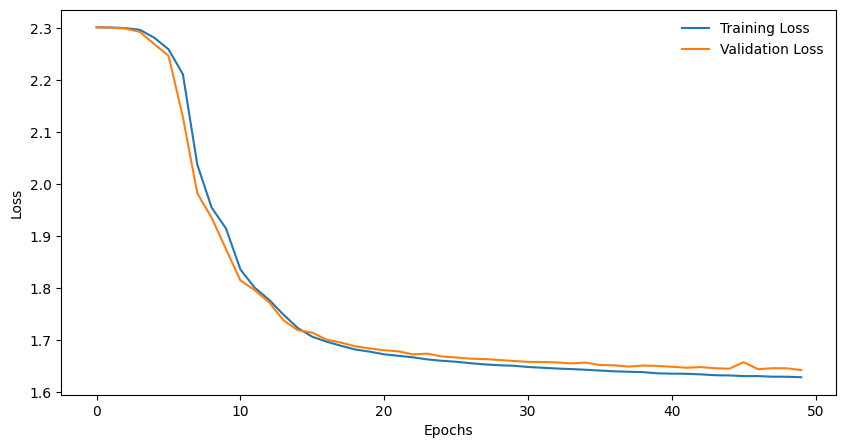

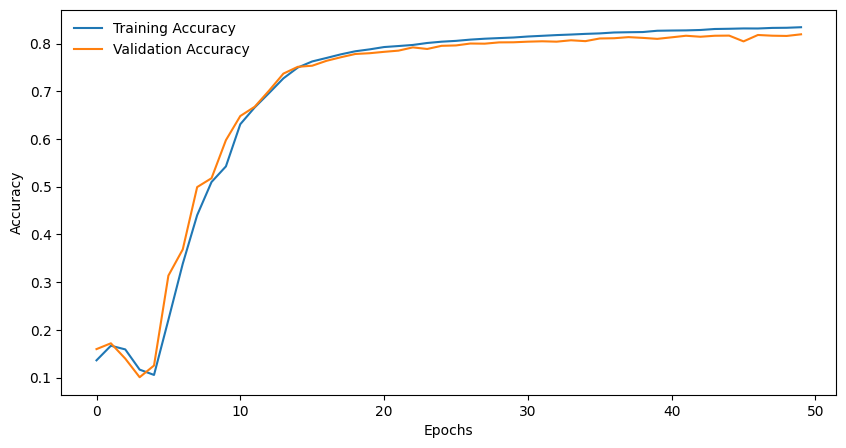

In [48]:
# Plotting the losses
plt.figure(figsize=(10,5))
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(frameon=False)
plt.show()

plt.figure(figsize=(10,5))
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(test_accuracies, label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(frameon=False)
plt.show()